In [1]:
import pandas as pd
import numpy as np

train_sample = pd.read_csv('train_sample.csv')
X = train_sample['id']
y = train_sample['landmark_id']

In [2]:
train_sample.head()

,id,url,landmark_id
0,0b7ca98b7ff8c0cd,https://lh6.googleusercontent.com/-jCiqpASe2Sk...,6696
1,9c2855ff7840a378,https://lh4.googleusercontent.com/-AVEfPLKUjwQ...,2743
2,0e93f2388ca6fe45,http://lh4.ggpht.com/-vyK23KRCis4/T7T_YFZ3rQI/...,5376
3,0f2ce5981fb1d432,https://lh5.googleusercontent.com/-NUKyaAOAgas...,13332
4,3a6fb5a3c1986e54,http://lh3.ggpht.com/-DsAMtI4g2fY/Shy3HGvuHiI/...,4352


In [3]:
len(train_sample)

8586

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)

for train_id, test_id in sss.split(X, y):
    X_train, X_tmp = X.iloc[train_id], X.iloc[test_id]
    y_train, y_tmp = y.iloc[train_id], y.iloc[test_id]

sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=10)

for train_id, test_id in sss1.split(X_tmp, y_tmp):
    X_valid, X_test = X_tmp.iloc[train_id], X_tmp.iloc[test_id]
    y_valid, y_test = y_tmp.iloc[train_id], y_tmp.iloc[test_id]

In [5]:
print(X_train[:5])
print(y_train[:5])

7492    af2ab3bcc420c102
6926    f2bc1e40df600b34
7348    09179f4332456c95
30      722aa21fb0aebd4b
7295    9eef8d5175fc6b06
Name: id, dtype: object
7492    3804
6926    4352
7348    6599
30      2949
7295    6051
Name: landmark_id, dtype: object


In [6]:
print(X_tmp[:5])
print(y_tmp[:5])

402     cca276b273062bde
1957    eaa82231250d1fec
2576    fb839d9804a4be61
5819    e0ab7fb24d3b1df1
691     65769236d0277f60
Name: id, dtype: object
402      6651
1957    10900
2576     6696
5819     9779
691     10184
Name: landmark_id, dtype: object


In [7]:
print(X_test[:5])
print(y_test[:5])

3614    4b6083b2306dba7f
7079    1c2cf8d553ba3bea
7003    a67d326e3d3a2132
8057    b564763955241c1b
3768    b66c9d1da856f31c
Name: id, dtype: object
3614     6599
7079     6051
7003     4352
8057     6051
3768    12220
Name: landmark_id, dtype: object


In [8]:
print(X_valid[:5])
print(y_valid[:5])

777     9f5dea8073cda22f
1544    1833a05cb6be7a32
1454    2e40e5c3c5da732b
519     646dac4ad07b7756
3176    c70fe509f46f17b3
Name: id, dtype: object
777      None
1544    13444
1454     5554
519      6651
3176     4981
Name: landmark_id, dtype: object


In [9]:
print("Train set size:", len(X_train))
print("Validation set size:", len(X_valid))
print("Test set size:", len(X_test))

Train set size: 6868
Validation set size: 859
Test set size: 859


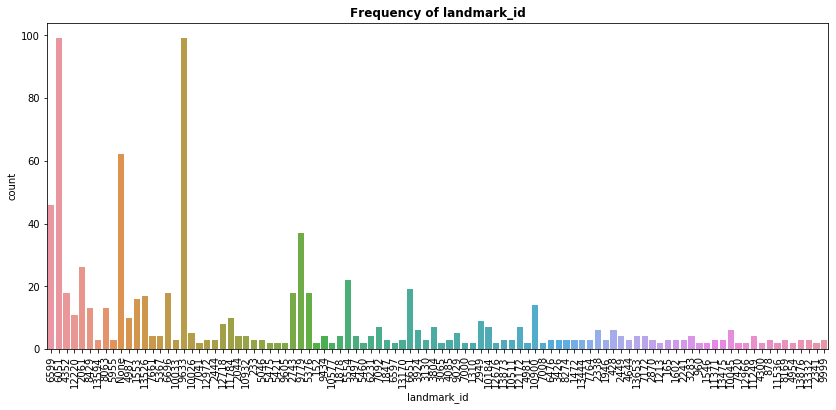

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

plt.figure(figsize = (14, 6))
g = sns.countplot(x=y_test)
g.set_title("Frequency of landmark_id", fontweight="bold", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [11]:
import os, shutil

from_path = "./train_images/"
moveto_path = "./valid_images/"

for f in X_valid.iloc[:] :
    src = from_path+f+'.jpg'
    dst = moveto_path+f+'.jpg'
    if os.path.exists(src):
        shutil.move(src, dst)

In [12]:
moveto_path = "./test_images/"

for f in X_test.iloc[:]:
    src = from_path+f+'.jpg'
    dst = moveto_path+f+'.jpg'
    if os.path.exists(src):
        shutil.move(src, dst)